In [1]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
zip_file = tf.keras.utils.get_file(origin=_URL,fname="flower_photos.tgz",extract=True)

In [4]:
zip_file

'C:\\Users\\HP\\.keras\\datasets\\flower_photos.tgz'

In [5]:
base_dir = os.path.join(os.path.dirname(zip_file),'flower_photos')

In [6]:
base_dir

'C:\\Users\\HP\\.keras\\datasets\\flower_photos'

In [7]:
os.listdir('C:\\Users\\HP\\.keras\\datasets\\flower_photos')

['daisy',
 'dandelion',
 'LICENSE.txt',
 'roses',
 'sunflowers',
 'train',
 'tulips',
 'val']

In [8]:
classes = ['roses','daisy','dandelion','sunflowers','tulips']

In [9]:
classes

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [11]:
round(len(images)*0.8)

513

In [12]:
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [13]:
train_dir

'C:\\Users\\HP\\.keras\\datasets\\flower_photos\\train'

In [14]:
val_dir

'C:\\Users\\HP\\.keras\\datasets\\flower_photos\\val'

In [15]:
batch_size = 10
IMG_SHAPE = 150

In [16]:
image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True)

In [17]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE,IMG_SHAPE)
                                              )

Found 2935 images belonging to 5 classes.


In [18]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img ,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

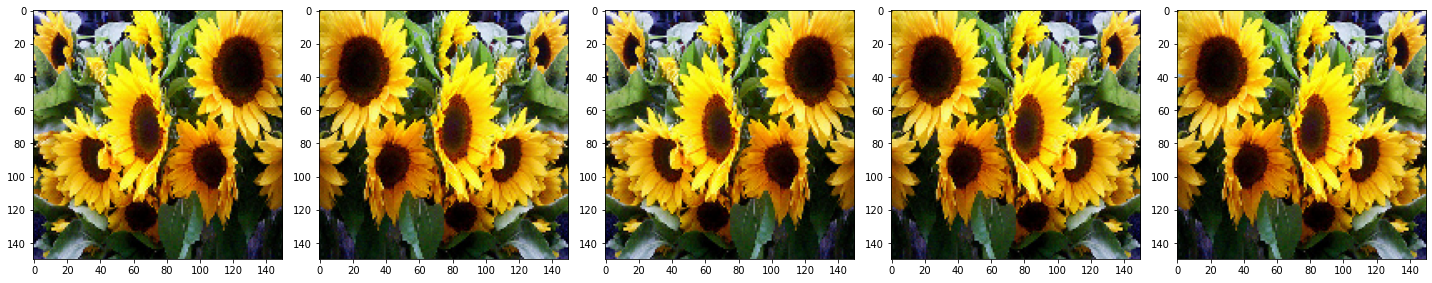

In [20]:
plotImages(augmented_images)

In [21]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5
                                    )

In [22]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='sparse')

Found 2935 images belonging to 5 classes.


In [23]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=val_dir,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse')

Found 735 images belonging to 5 classes.


In [24]:
train_data_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [25]:
model = Sequential()
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [27]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [28]:
epochs = 80
history = model.fit(train_data_gen,
                   steps_per_epoch=int(np.ceil(train_data_gen.n/float(batch_size))),
                    epochs=epochs,
                   validation_data=val_data_gen,
                   validation_steps=int(np.ceil(val_data_gen.n/float(batch_size))))

Epoch 1/80
294/294 [==============================] - 81s 275ms/step - loss: 1.3850 - accuracy: 0.4072 - val_loss: 1.1171 - val_accuracy: 0.5170
Epoch 2/80
294/294 [==============================] - 60s 205ms/step - loss: 1.1200 - accuracy: 0.5295 - val_loss: 1.0003 - val_accuracy: 0.6068
Epoch 3/80
294/294 [==============================] - 62s 211ms/step - loss: 1.0233 - accuracy: 0.5894 - val_loss: 0.8604 - val_accuracy: 0.6490
Epoch 4/80
294/294 [==============================] - 98s 335ms/step - loss: 0.9695 - accuracy: 0.6164 - val_loss: 0.9974 - val_accuracy: 0.6381
Epoch 5/80
294/294 [==============================] - 111s 375ms/step - loss: 0.9226 - accuracy: 0.6371 - val_loss: 0.8031 - val_accuracy: 0.6844
Epoch 6/80
294/294 [==============================] - 117s 396ms/step - loss: 0.8871 - accuracy: 0.6484 - val_loss: 0.8132 - val_accuracy: 0.7048
Epoch 7/80
294/294 [==============================] - 109s 369ms/step - loss: 0.8603 - accuracy: 0.6692 - val_loss: 0.7703 - val

294/294 [==============================] - 89s 301ms/step - loss: 0.5413 - accuracy: 0.7993 - val_loss: 0.7763 - val_accuracy: 0.7592
Epoch 58/80
294/294 [==============================] - 91s 308ms/step - loss: 0.5175 - accuracy: 0.7993 - val_loss: 0.6844 - val_accuracy: 0.7714
Epoch 59/80
294/294 [==============================] - 93s 316ms/step - loss: 0.4933 - accuracy: 0.8170 - val_loss: 0.6776 - val_accuracy: 0.7660
Epoch 60/80
294/294 [==============================] - 96s 327ms/step - loss: 0.5252 - accuracy: 0.8075 - val_loss: 0.6572 - val_accuracy: 0.7687
Epoch 61/80
294/294 [==============================] - 97s 329ms/step - loss: 0.5025 - accuracy: 0.7990 - val_loss: 0.8290 - val_accuracy: 0.7442
Epoch 62/80
294/294 [==============================] - 96s 326ms/step - loss: 0.5172 - accuracy: 0.8048 - val_loss: 0.7103 - val_accuracy: 0.7565
Epoch 63/80
294/294 [==============================] - 90s 307ms/step - loss: 0.4967 - accuracy: 0.8140 - val_loss: 0.7316 - val_accurac